# Power Transformation

In [12]:
!pip install matplotlib

In [3]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import pandas as pd

#selecting first 5 column
#Removes all rows with missing values (NaN/Null) from the DataFrame.
df = pd.read_csv("sample_dataset.csv").iloc[:,0:5].dropna()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


<Axes: >

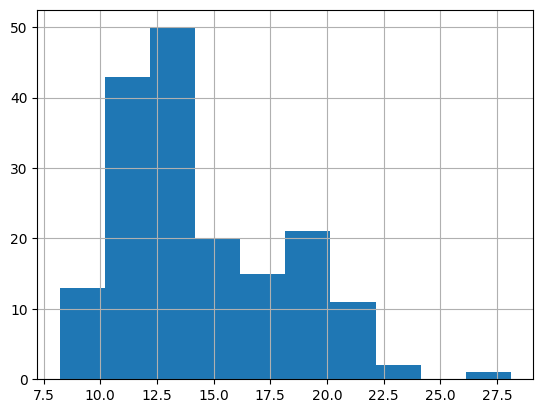

In [15]:
df['mean radius'].hist() #histogram with the data of mean radius column

#you can see the histogram mostly concentrated in the left

# Yeo Johnson Power transform


Applicability:

- Works for all real numbers (positive, zero, and negative values).

Use Case:

- Any skewed data (left/right, positive/negative).

- More robust than Box-Cox.

Optimization:

- Like Box-Cox, it optimizes λ for best normality.

In [16]:
power=PowerTransformer()
t=power.fit_transform(df)
t

array([[ 1.39469851e+00,  5.10996630e-01,  1.38089375e+00,
         1.39112944e+00,  8.89375285e-01],
       [-8.39115600e-01,  3.27773878e-01, -5.97833811e-01,
        -9.22510329e-01,  2.68293759e+00],
       [-2.44258164e-01,  6.27334561e-01, -8.28003584e-02,
        -2.44759559e-01,  1.91933168e+00],
       [ 5.86888760e-01,  1.03861937e+00,  5.86306968e-01,
         6.01026695e-01, -9.25030541e-01],
       [-5.87313992e-03,  7.84030362e-01,  1.90504578e-01,
        -1.50073069e-02,  1.10624790e+00],
       [ 1.41588009e+00,  6.93415469e-01,  1.38089375e+00,
         1.47070111e+00,  1.40968833e-01],
       [-2.17127961e-01, -7.98353618e-01, -1.72671782e-01,
        -2.43918510e-01,  7.55917139e-01],
       [-1.75596825e+00, -1.78494516e+00, -1.79454023e+00,
        -1.77785322e+00,  4.21015236e-01],
       [ 8.90051031e-01, -6.14164790e-01,  9.93307862e-01,
         8.94434246e-01,  1.43351674e+00],
       [ 2.47964324e-01,  5.68499276e-01,  3.47394876e-01,
         2.12550635e-01

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([-2.54500995, -2.03906966, -1.53312936, -1.02718906, -0.52124877,
        -0.01530847,  0.49063182,  0.99657212,  1.50251242,  2.00845271,
         2.51439301]),
 <BarContainer object of 10 artists>)

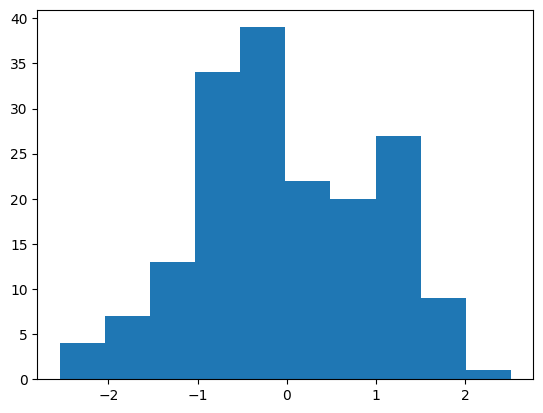

In [17]:
#the histogram has now changed and moved into middle or symmetric
plt.hist(t[:,0]) #histogram of the first column == mean radius

#So, this is what we do to make it symmetric

# Box Cox data

Applicability:

- Only works for strictly positive data (x>0)

- If data contains zeros or negatives, it fails.

Use Case:

- Right/left-skewed data with positive values.

- Variance stabilization.

Optimization:

- Automatically finds the best λ (via MLE) to maximize normality.

Limitations:

❌ Fails if data has zeros or negative values.

❌ Less flexible than Yeo-Johnson.

In [18]:
power=PowerTransformer('box-cox')
t=power.fit_transform(df)
t

array([[ 1.39346139e+00,  5.10442398e-01,  1.38067122e+00,
         1.39105660e+00,  8.85068620e-01],
       [-8.37677674e-01,  3.27402107e-01, -5.97567204e-01,
        -9.22386959e-01,  2.69997336e+00],
       [-2.43204627e-01,  6.26686048e-01, -8.26543086e-02,
        -2.44701478e-01,  1.91604582e+00],
       [ 5.86077024e-01,  1.03782483e+00,  5.86176882e-01,
         6.00930879e-01, -9.19684557e-01],
       [-5.30282764e-03,  7.83288155e-01,  1.90539792e-01,
        -1.49936135e-02,  1.10065301e+00],
       [ 1.41468215e+00,  6.92722412e-01,  1.38067122e+00,
         1.47064870e+00,  1.43154652e-01],
       [-2.16123037e-01, -7.97506302e-01, -1.72494125e-01,
        -2.43860583e-01,  7.52623508e-01],
       [-1.75824299e+00, -1.78508277e+00, -1.79506091e+00,
        -1.77798772e+00,  4.20671749e-01],
       [ 8.88735302e-01, -6.13446161e-01,  9.93065696e-01,
         8.94315246e-01,  1.42720318e+00],
       [ 2.47934104e-01,  5.67896061e-01,  3.47362412e-01,
         2.12519023e-01

(array([ 4.,  7., 12., 34., 40., 22., 20., 28.,  8.,  1.]),
 array([-2.55704087, -2.04914834, -1.54125581, -1.03336328, -0.52547074,
        -0.01757821,  0.49031432,  0.99820685,  1.50609938,  2.01399191,
         2.52188444]),
 <BarContainer object of 10 artists>)

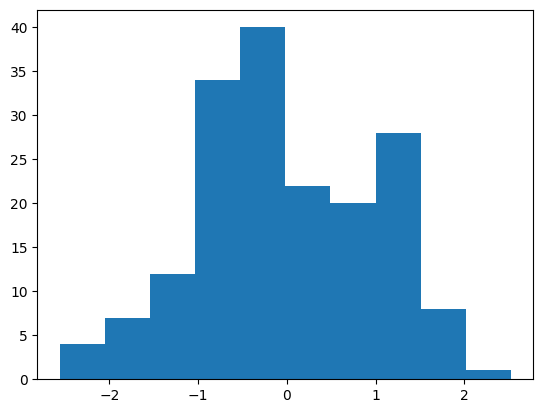

In [19]:
plt.hist(t[:,0]) #for mean  radius, you can see the data is  mostly concentrated in the middle

<Axes: >

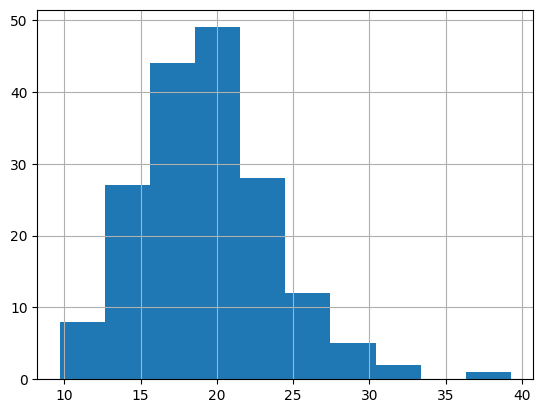

In [20]:
# if we check the data of mean texture
df['mean texture'].hist() # you can see the data is a bit left concentrated.

(array([ 2., 10., 20., 32., 37., 42., 20., 10.,  2.,  1.]),
 array([-2.81207169, -2.20309339, -1.59411509, -0.98513679, -0.37615849,
         0.23281981,  0.8417981 ,  1.4507764 ,  2.0597547 ,  2.668733  ,
         3.2777113 ]),
 <BarContainer object of 10 artists>)

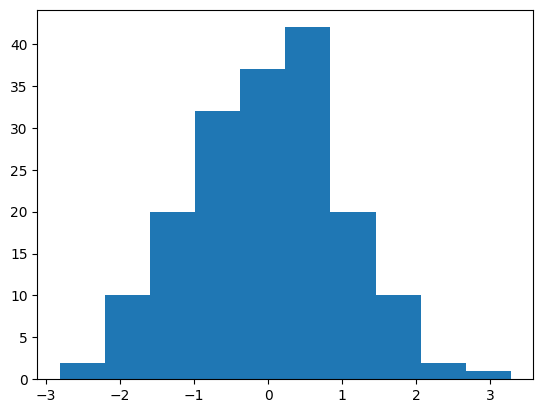

In [21]:
#once transformed, the mean texture data now  looks like this

plt.hist(t[:,1]) #mean texture converted to this after box cox transformation

# Difference between Box Cox and Yeo Johnson

Both Box-Cox and Yeo-Johnson are power transformation techniques used to make non-normal data more Gaussian-like (normally distributed), which is often required for many statistical models and machine learning algorithms that assume normality (e.g., linear regression, Gaussian processes). However, they differ in their assumptions and applicability.


- Box-Cox is simpler but limited to positive data.

- Yeo-Johnson is more versatile and works for all real numbers.

- Default choice: Use Yeo-Johnson unless you’re sure your data is strictly positive.